In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load data

In [3]:
header_file = open('assets/header.txt','r')
text = header_file.read()
text

'CPL_wrt_BC,\nclient_state,\nduration,\nnum_prods,\ncalls,\nCPL_wrt_self,\nchurn,\navg_budget,\nBC,\nclicks,\n'

In [4]:
header = text.split(',\n')[:-1]
header

['CPL_wrt_BC',
 'client_state',
 'duration',
 'num_prods',
 'calls',
 'CPL_wrt_self',
 'churn',
 'avg_budget',
 'BC',
 'clicks']

In [5]:
# load data
df = pd.read_csv('assets/data.csv',names=header)
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


### Data wrangling

In [7]:
# fill missing data
df = df.fillna(value=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    10000 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [8]:
data = df
data.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,0.000000,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [9]:
# all locations 
state = data['client_state'].value_counts()
state

CA    1745
TX     895
FL     746
NY     658
PA     564
IL     546
MD     380
GA     345
NJ     343
WA     315
VA     314
MA     299
OH     288
CO     278
AZ     278
MO     185
NC     183
OR     144
MN     137
IN     128
MI     110
TN      96
WI      90
LA      84
NV      66
SC      63
CT      54
ME      54
NH      53
UT      52
KS      51
AL      47
DC      42
RI      41
IA      40
MS      38
OK      36
KY      34
NE      29
DE      27
ID      23
HI      18
AR      18
SD      15
AK      10
MT      10
NM      10
VT       8
ND       6
WV       3
WY       1
Name: client_state, dtype: int64

In [10]:
# all state with small number of clients can be considered into one group
small_state = state[state<100].index
small_state

Index(['TN', 'WI', 'LA', 'NV', 'SC', 'CT', 'ME', 'NH', 'UT', 'KS', 'AL', 'DC',
       'RI', 'IA', 'MS', 'OK', 'KY', 'NE', 'DE', 'ID', 'HI', 'AR', 'SD', 'AK',
       'MT', 'NM', 'VT', 'ND', 'WV', 'WY'],
      dtype='object')

In [11]:
# replace small_state with value of 'Other_states'
data['client_state'] = data['client_state'].replace(small_state,'Other_states')
data.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,0.000000,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [12]:
# for categorical variables
data = pd.get_dummies(data,columns=['client_state','BC'])
data.head()


,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks,client_state_AZ,client_state_CA,...,BC_Industrial & Commercial,"BC_Personal Services (Weddings, Cleaners, etc.)",BC_Physicians & Surgeons,BC_Real Estate,BC_Religion & Spirituality,BC_Restaurants & Food,"BC_Shopping, Collectibles & Gifts (General)",BC_Sports & Recreation,BC_Toys & Hobbies,BC_Travel
0,0.000000,73,6,2,0.000000,1,10082.152554,107,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.623618,1,1,3,0.000000,0,133.928571,79,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.007905,102,2,8,-0.292008,0,3935.017462,90,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.104900,6,1,5,0.587206,0,461.538462,112,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.013057,34,1,6,-0.955335,1,314.705882,95,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
CPL_wrt_BC                                         10000 non-null float64
duration                                           10000 non-null int64
num_prods                                          10000 non-null int64
calls                                              10000 non-null int64
CPL_wrt_self                                       10000 non-null float64
churn                                              10000 non-null int64
avg_budget                                         10000 non-null float64
clicks                                             10000 non-null int64
client_state_AZ                                    10000 non-null uint8
client_state_CA                                    10000 non-null uint8
client_state_CO                                    10000 non-null uint8
client_state_FL                                    10000 non-null uint8
client_state_GA       

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize

from sklearn.linear_model import LogisticRegression


In [15]:
# independent variables (X)
x = data.drop('churn',1)
x.head()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,avg_budget,clicks,client_state_AZ,client_state_CA,client_state_CO,...,BC_Industrial & Commercial,"BC_Personal Services (Weddings, Cleaners, etc.)",BC_Physicians & Surgeons,BC_Real Estate,BC_Religion & Spirituality,BC_Restaurants & Food,"BC_Shopping, Collectibles & Gifts (General)",BC_Sports & Recreation,BC_Toys & Hobbies,BC_Travel
0,0.000000,73,6,2,0.000000,10082.152554,107,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.623618,1,1,3,0.000000,133.928571,79,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.007905,102,2,8,-0.292008,3935.017462,90,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.104900,6,1,5,0.587206,461.538462,112,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.013057,34,1,6,-0.955335,314.705882,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
CPL_wrt_BC                                         10000 non-null float64
duration                                           10000 non-null int64
num_prods                                          10000 non-null int64
calls                                              10000 non-null int64
CPL_wrt_self                                       10000 non-null float64
avg_budget                                         10000 non-null float64
clicks                                             10000 non-null int64
client_state_AZ                                    10000 non-null uint8
client_state_CA                                    10000 non-null uint8
client_state_CO                                    10000 non-null uint8
client_state_FL                                    10000 non-null uint8
client_state_GA                                    10000 non-null uint8
client_state_IL       

In [17]:
# target variable
y = data['churn']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: churn, dtype: int64

In [18]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=9)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8000, 60) (8000,)
(2000, 60) (2000,)


In [19]:
def model_accuracy(model, X_test, Y_test):
    # accuracy
    acc = model.score(X_test, Y_test) 
    print('Accuracy: ' , acc)
    
    # prediction
    ypred = model.predict(X_test)
    
    # confusion matrix
    cm = confusion_matrix(Y_test,ypred,labels=[0,1])
    print('Confusion matrix:')    
    print(cm)
    
    # Area Under the Receiver Operating Characteristic Curve
    roc = roc_auc_score(Y_test, ypred)
    print('ROC: ' , roc)
    
    print(classification_report(Y_test, ypred))

In [20]:
def plot_roc(model, X_test, Y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
def adjust_threshold(model,X_test,Y_test,threshold):
    # predict for class 1
    ypre_1 = model.predict_proba(X_test)[:,1]
    ypred_class = binarize(ypre_1.reshape(-1,1),threshold)
    
    print('Threshold: ', threshold)
    # accuracy
    acc = accuracy_score(Y_test, ypred_class) 
    print('Accuracy: ' , acc)
        
    # confusion matrix
    cm = confusion_matrix(Y_test,ypred_class,labels=[0,1])
    print('Confusion matrix:')    
    print(cm)
    
    # Area Under the Receiver Operating Characteristic Curve
    roc = roc_auc_score(Y_test, ypred_class)
    print('ROC: ' , roc)
    
    print(classification_report(Y_test, ypred_class))

### Feature Scaling - Minmax scaler

In [22]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1)).fit(X_train)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

In [23]:
X_train

array([[0.00856351, 0.        , 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.04733428, 0.24786325, 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.05257072, 0.2991453 , 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04766183, 0.25641026, 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.04591005, 0.        , 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.05067691, 0.09401709, 0.09090909, ..., 0.        , 0.        ,
        0.        ]])

In [24]:
X_test

array([[0.04643857, 0.2991453 , 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.05168395, 0.02564103, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.06324869, 0.15384615, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04743109, 0.17094017, 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.04678501, 0.05128205, 0.09090909, ..., 1.        , 0.        ,
        0.        ],
       [0.04651296, 0.1025641 , 0.09090909, ..., 0.        , 0.        ,
        0.        ]])

## Building a model

### a. Logistic regresion

In [25]:
%%time
logit_params = {'C': [.01, .1, 1., 10., 100.]}
logit = LogisticRegression()
gsmodel_1 = GridSearchCV(logit, logit_params, cv=4)
gsmodel_1.fit(X_train, Y_train)

Wall time: 1.66 s


In [26]:
model_accuracy(gsmodel_1,X_test,Y_test)

Accuracy:  0.8
Confusion matrix:
[[1600    0]
 [ 400    0]]
ROC:  0.5
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [27]:
gsmodel_1.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

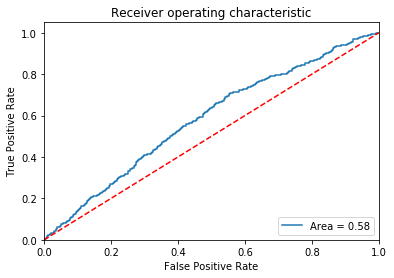

In [28]:
plot_roc(gsmodel_1.best_estimator_,X_test,Y_test)

In [29]:
gsmodel_1.best_estimator_.coef_

array([[-0.0400892 , -0.51633748, -0.16900325, -0.20234955, -0.00903893,
        -0.038624  , -0.23465233, -0.00176293, -0.11434673, -0.03495569,
         0.01483838,  0.03685721, -0.0347259 ,  0.04340213, -0.07789731,
        -0.11227866, -0.00603978, -0.0024431 , -0.03081141, -0.01637563,
        -0.09711093, -0.12794018, -0.08334461,  0.06315987, -0.03501382,
        -0.07729501, -0.10425184, -0.01011158, -0.05943863, -0.15668682,
         0.02939026,  0.07299052,  0.01930803,  0.09398412, -0.12339923,
        -0.09410339,  0.01843125,  0.0331937 ,  0.02931861,  0.00328179,
         0.03246347, -0.0504545 ,  0.01531042, -0.00943335, -0.01654392,
         0.03593948, -0.07327572,  0.00278474,  0.02491796, -0.10612875,
        -0.10756793, -0.09253168, -0.11059131,  0.02831913,  0.00641009,
         0.07771273, -0.32426208, -0.01395368,  0.00472627, -0.11743634]])

In [30]:
# examining the coefficients
pd.DataFrame(index=x.columns,data=np.transpose(gsmodel_1.best_estimator_.coef_), columns=['coeff']).sort_values(by=['coeff']).head(20)

,coeff
duration,-0.516337
"BC_Shopping, Collectibles & Gifts (General)",-0.324262
clicks,-0.234652
calls,-0.202350
num_prods,-0.169003
BC_Animals & Pets,-0.156687
client_state_NY,-0.127940
"BC_Automotive -- Repair, Service & Parts",-0.123399
BC_Travel,-0.117436
client_state_CA,-0.114347


In [31]:
pd.DataFrame(index=x.columns,data=np.transpose(gsmodel_1.best_estimator_.coef_), columns=['coeff']).sort_values(by=['coeff']).tail(20)

,coeff
"BC_Community, Garage Sales & Organizations",0.003282
BC_Toys & Hobbies,0.004726
BC_Religion & Spirituality,0.006410
client_state_FL,0.014838
BC_Education & Instruction,0.015310
BC_Business Opportunities,0.018431
BC_Attorneys & Legal Services,0.019308
BC_Health & Fitness,0.024918
BC_Real Estate,0.028319
BC_Career & Employment,0.029319


Logistic regresion has a poor performance for this case.
For class 1, recall and precision are 0. This is unacceptable.

## b. Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
%%time
tree_params = {'min_samples_split': [2,4, 8, 16], 
               'min_samples_leaf': [1,2, 4, 8]}
gsmodel_2 = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=4)
gsmodel_2.fit(X_train, Y_train)

Wall time: 10.2 s


In [34]:
model_accuracy(gsmodel_2,X_test,Y_test)

Accuracy:  0.7905
Confusion matrix:
[[1451  149]
 [ 270  130]]
ROC:  0.6159374999999999
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1600
           1       0.47      0.33      0.38       400

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.65      0.62      0.63      2000
weighted avg       0.77      0.79      0.78      2000



In [35]:
gsmodel_2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

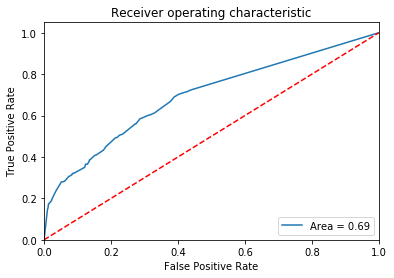

In [36]:
plot_roc(gsmodel_2.best_estimator_,X_test,Y_test)

In [37]:
# examining the feature importances
pd.DataFrame(index=x.columns, data=np.transpose(gsmodel_2.best_estimator_.feature_importances_ ),columns=['score']).sort_values(by='score',ascending=False).head(10)

,score
CPL_wrt_BC,0.266404
CPL_wrt_self,0.214181
duration,0.203377
avg_budget,0.134704
clicks,0.068064
calls,0.049123
BC_Education & Instruction,0.007665
num_prods,0.007227
BC_Home & Home Improvement,0.005481
"BC_Shopping, Collectibles & Gifts (General)",0.005314


### c. Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
%%time
forest_params = {'oob_score': [True, False], 
                 'min_samples_split': [2,4,8, 16], 
                 'min_samples_leaf': [1,2,4, 8]}
gsmodel_3 = GridSearchCV(RandomForestClassifier(), forest_params, cv=4)
gsmodel_3.fit(X_train, Y_train)

Wall time: 27.5 s


In [40]:
model_accuracy(gsmodel_3,X_test,Y_test)

Accuracy:  0.8165
Confusion matrix:
[[1550   50]
 [ 317   83]]
ROC:  0.588125
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1600
           1       0.62      0.21      0.31       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000



In [41]:
gsmodel_3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

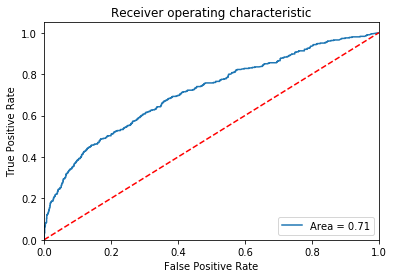

In [42]:
plot_roc(gsmodel_3.best_estimator_,X_test,Y_test)

In [43]:
# examining the feature importances
pd.DataFrame(index=x.columns, data=np.transpose(gsmodel_3.best_estimator_.feature_importances_ ),columns=['score']).sort_values(by='score',ascending=False).head(20)

,score
CPL_wrt_self,0.183981
duration,0.146368
CPL_wrt_BC,0.143836
avg_budget,0.134828
clicks,0.097361
calls,0.062223
num_prods,0.019061
BC_Home & Home Improvement,0.014129
client_state_CA,0.010513
client_state_Other_states,0.009747


### d. Gradient Boosting 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
%%time
gb_params = {'subsample': [1., .8, .5]}

gsmodel_4 = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=4)
gsmodel_4.fit(X_train,Y_train)

Wall time: 28.5 s


In [46]:
model_accuracy(gsmodel_4.best_estimator_,X_test,Y_test)

Accuracy:  0.822
Confusion matrix:
[[1554   46]
 [ 310   90]]
ROC:  0.598125
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1600
           1       0.66      0.23      0.34       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.80      0.82      0.78      2000



In [47]:
gsmodel_4.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [48]:
# examining the feature importances
pd.DataFrame(index=x.columns, data=np.transpose(gsmodel_4.best_estimator_.feature_importances_ ),columns=['score']).sort_values(by='score',ascending=False).head(20)

,score
duration,0.434503
CPL_wrt_self,0.230864
CPL_wrt_BC,0.158635
avg_budget,0.078755
"BC_Shopping, Collectibles & Gifts (General)",0.025027
clicks,0.010395
BC_Education & Instruction,0.006903
calls,0.006051
BC_Furniture,0.006040
BC_Automotive -- For Sale,0.005589


## Evaluation a model

- Our models are highly specific but sensitive. <br>
- Because false positives (clients are retention that are flagged to be ‘churn’) are more acceptable than false negatives (clients will stop running advertising that are not detected). <br>
- So, it should choice recall and precision for evaluation. <br>

### Adjust threshold
Optimize is to maximize recall and precision.

Let's take a look at Gradient Boost model:


In [49]:
# probability for classification
model = gsmodel_4.best_estimator_
model.predict_proba(X_test)

array([[0.94483182, 0.05516818],
       [0.71314007, 0.28685993],
       [0.87780185, 0.12219815],
       ...,
       [0.76361276, 0.23638724],
       [0.26155858, 0.73844142],
       [0.70785852, 0.29214148]])

In [50]:
# predict for class 1
ypre_1 = model.predict_proba(X_test)[:,1]

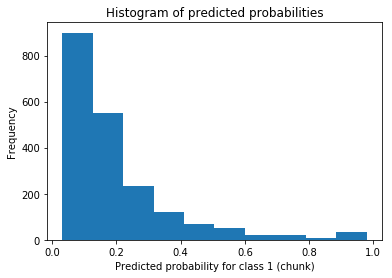

In [51]:
plt.hist(ypre_1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for class 1 (chunk)')
plt.ylabel('Frequency')
plt.show()

It indicates that:
- More than 70% of observations have probability less than 0.25
- Small number of observations with probability > 0.5
- This is below the threshold of 0.5
- Most would be predicted 'retention' (class 0) 

### a. Logistic regression

In [52]:
adjust_threshold(gsmodel_1,X_test,Y_test,0.3)

Threshold:  0.3
Accuracy:  0.8
Confusion matrix:
[[1600    0]
 [ 400    0]]
ROC:  0.5
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [53]:
adjust_threshold(gsmodel_1,X_test,Y_test,0.25)

Threshold:  0.25
Accuracy:  0.758
Confusion matrix:
[[1473  127]
 [ 357   43]]
ROC:  0.5140625
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1600
           1       0.25      0.11      0.15       400

   micro avg       0.76      0.76      0.76      2000
   macro avg       0.53      0.51      0.50      2000
weighted avg       0.69      0.76      0.72      2000



In [54]:
adjust_threshold(gsmodel_1,X_test,Y_test,0.2)

Threshold:  0.2
Accuracy:  0.446
Confusion matrix:
[[ 591 1009]
 [  99  301]]
ROC:  0.5609375
              precision    recall  f1-score   support

           0       0.86      0.37      0.52      1600
           1       0.23      0.75      0.35       400

   micro avg       0.45      0.45      0.45      2000
   macro avg       0.54      0.56      0.43      2000
weighted avg       0.73      0.45      0.48      2000



### b. Decision tree

In [55]:
adjust_threshold(gsmodel_2,X_test,Y_test,0.3)

Threshold:  0.3
Accuracy:  0.7305
Confusion matrix:
[[1267  333]
 [ 206  194]]
ROC:  0.6384375
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1600
           1       0.37      0.48      0.42       400

   micro avg       0.73      0.73      0.73      2000
   macro avg       0.61      0.64      0.62      2000
weighted avg       0.76      0.73      0.74      2000



In [56]:
adjust_threshold(gsmodel_2,X_test,Y_test,0.2)

Threshold:  0.2
Accuracy:  0.684
Confusion matrix:
[[1133  467]
 [ 165  235]]
ROC:  0.6478125
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1600
           1       0.33      0.59      0.43       400

   micro avg       0.68      0.68      0.68      2000
   macro avg       0.60      0.65      0.60      2000
weighted avg       0.77      0.68      0.71      2000



### c. Random forest

In [57]:
adjust_threshold(gsmodel_3,X_test,Y_test,0.3)

Threshold:  0.3
Accuracy:  0.767
Confusion matrix:
[[1349  251]
 [ 215  185]]
ROC:  0.6528125
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1600
           1       0.42      0.46      0.44       400

   micro avg       0.77      0.77      0.77      2000
   macro avg       0.64      0.65      0.65      2000
weighted avg       0.77      0.77      0.77      2000



In [58]:
adjust_threshold(gsmodel_3,X_test,Y_test,0.2)

Threshold:  0.2
Accuracy:  0.658
Confusion matrix:
[[1059  541]
 [ 143  257]]
ROC:  0.6521875
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1600
           1       0.32      0.64      0.43       400

   micro avg       0.66      0.66      0.66      2000
   macro avg       0.60      0.65      0.59      2000
weighted avg       0.77      0.66      0.69      2000



### d. Gradient Boosting

In [59]:
adjust_threshold(gsmodel_4,X_test,Y_test,0.3)

Threshold:  0.3
Accuracy:  0.807
Confusion matrix:
[[1432  168]
 [ 218  182]]
ROC:  0.675
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1600
           1       0.52      0.46      0.49       400

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.80      0.81      0.80      2000



In [60]:
adjust_threshold(gsmodel_4,X_test,Y_test,0.25)

Threshold:  0.25
Accuracy:  0.787
Confusion matrix:
[[1354  246]
 [ 180  220]]
ROC:  0.698125
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1600
           1       0.47      0.55      0.51       400

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.79      2000



In [61]:
adjust_threshold(gsmodel_4,X_test,Y_test,0.2)

Threshold:  0.2
Accuracy:  0.7525
Confusion matrix:
[[1247  353]
 [ 142  258]]
ROC:  0.7121875
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1600
           1       0.42      0.65      0.51       400

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.75      0.77      2000

